# HR Analytics Project- Understanding the Attrition in HR

# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


All total we have 34 features consisting of both the categorical as well as the numerical features. 

The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

# Exploratory Data Analysis

In [3]:
df.shape

(1470, 35)

- So our dataset has 1470 rows and 35 columns totally.

In [4]:
# This will give Index, Datatype and Memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Seems like there are no null values.
- Also, some columns have object datatype which means we have to encode.
- Dataset has objects and integer data types.
- There is no variable with float data type.
- There are 26 variable with int data types.
- There are 9 variable with object data type.

In [5]:
# check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There are no null or missing values in data set

In [6]:
# check for duplicate data
df.duplicated().sum()

0

- No duplicate data found.

In [7]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- Data is imbalanced by class we have 1233 people who have not left the company and 237 people who have left the company

<AxesSubplot:xlabel='Attrition', ylabel='count'>

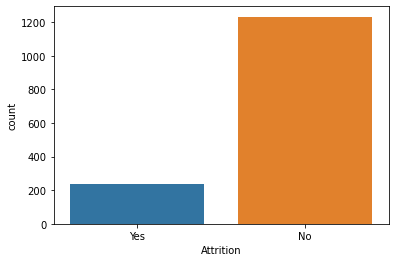

In [8]:
sns.countplot(df['Attrition'])

- The Target variable class is not balanced.
- The target variable will be treated for class imbalance later
- Attrition level 'No' is High as compared to Attrition level 'Yes'.

In [9]:
# check the stats
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

According to me, 'EmployeeNumber' has no impact on our target variable 'Attrition', so lets drop the column to make the model analysis better.

In [11]:
df.drop(['EmployeeNumber'],axis = 1,inplace = True)

# Skewness Detection

In [12]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# Data Visualization

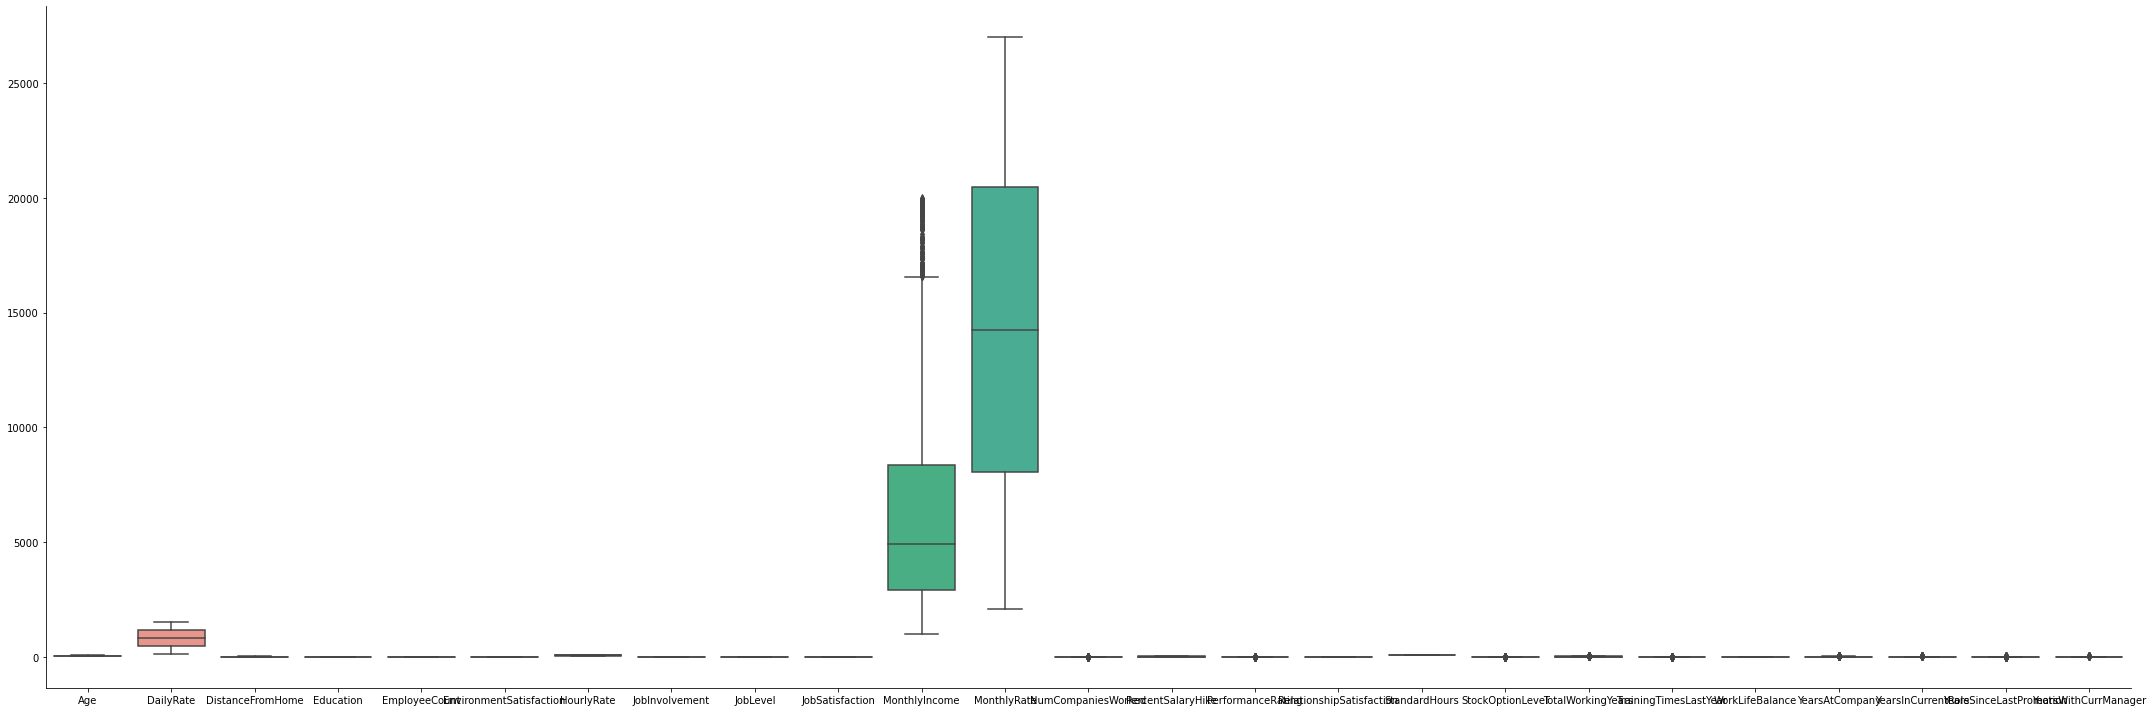

In [13]:
sns.factorplot(data=df,kind='box',size=10,aspect=3)

- Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>],
       [<AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'cent

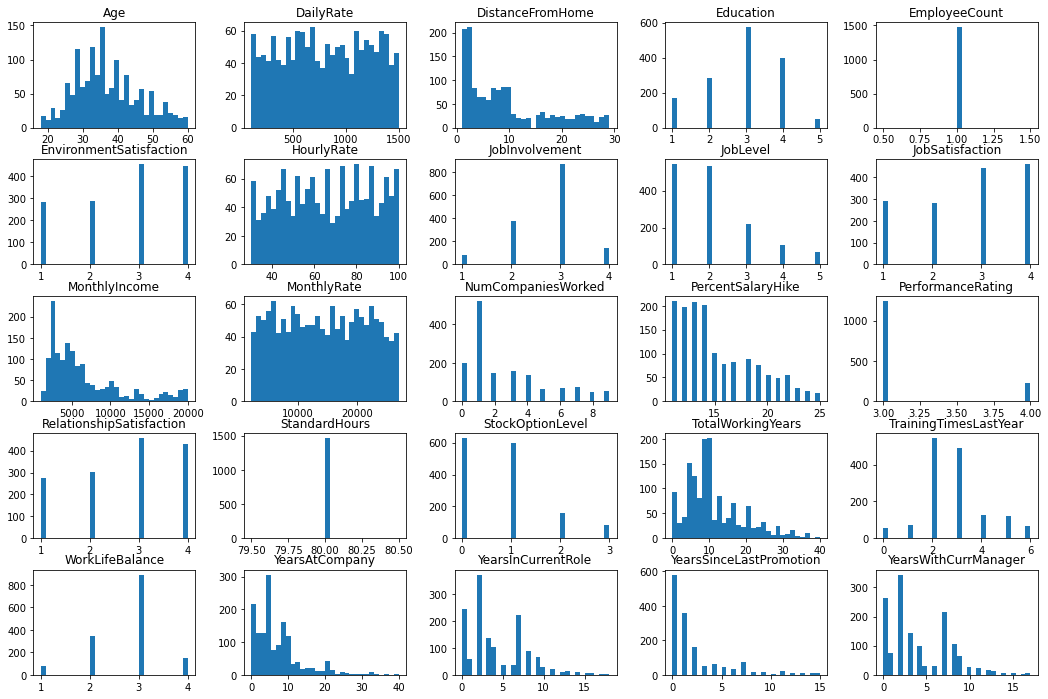

In [14]:
df.hist(grid=False, figsize=(18,12), bins=30)

- There are continous variable which are right skewed.
- These variables shows some positive skewness and slightly right skewed.

<AxesSubplot:xlabel='Age', ylabel='Density'>

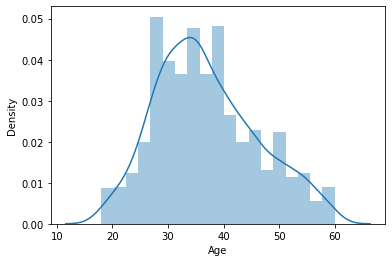

In [15]:
sns.distplot(df['Age'])

# Dividing dataset into numeric & object data type

In [16]:
#Numeric & Object Data type is separated for better EDA.
numerics_var = ['float64', 'int64']
numeric_df = df.select_dtypes(include=numerics_var)
objects_df = df.select_dtypes(exclude=numerics_var)

In [17]:
numeric_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,3,61,2,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,92,2,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,4,56,3,1,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,...,4,80,1,6,3,3,2,2,2,2


- There are 26 rows which are numeric data type.

In [18]:
objects_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


- There are 9 col which are object data types

In [19]:
objects_df.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


- Count reflects no of rows which is 1470 in all object col.
- Attrition has 2 binary class i.e, yes & no, where count of 'No' is 1233.
- Education filed has 6 class with freq = 606 and the highest class is life Science.
- Gender has male count high with freq = 882.

In [20]:
numeric_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- High difference seen between max & 75 percentile for most of the variables.
- std seen high for Dailyrate, EmployeeNumber.
- Mean is greatert then 50% percentile in DistanceFromHome,TotalWorkingYears,YearsAtCompany.
- As per obs data is skewed & not normal distributed for these variables.
- Similar observations can be drawn for other variables.

# Countplot for Object/Category Variable.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

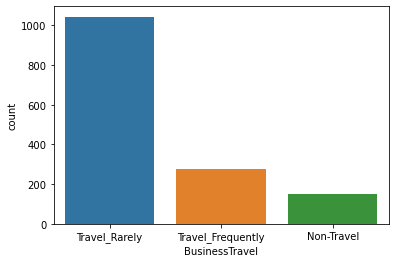

In [21]:
sns.countplot(df['BusinessTravel'])

- The plot above clearly shows that most people belong to the "Travel_Rarely" class. This indicates that most people did not have jobs that required them to travel frequently.

<AxesSubplot:xlabel='Department', ylabel='count'>

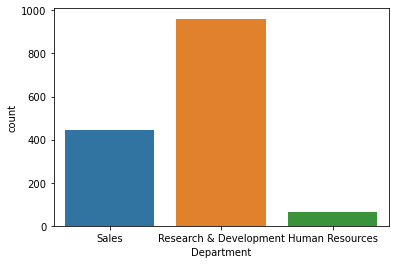

In [22]:
sns.countplot(df['Department'])

- Department also has three class where freq of R&D class is highest.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

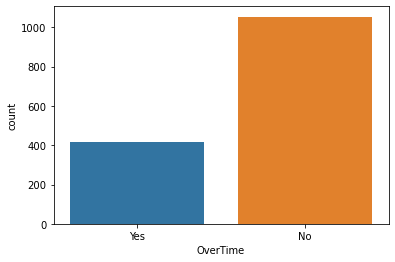

In [23]:
sns.countplot(df['OverTime'])

- large count has no overtime.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

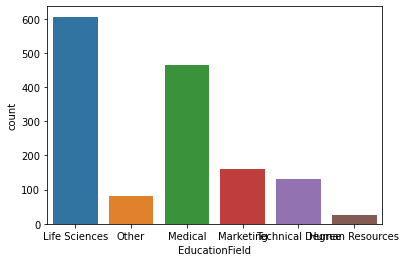

In [24]:
sns.countplot(df['EducationField'])

- There is 6 Education field out of which majority are from life science then medical.

<AxesSubplot:xlabel='Gender', ylabel='count'>

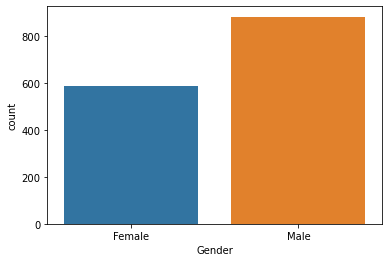

In [25]:
sns.countplot(df['Gender'])

In [26]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins = True, normalize = 'index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


- Gender has only 2 class male & female.
- We can observe that, males are presnt in higher number.
- About 83% of Males want to stay in the organisation while only 17% want to leave the organisation. 
- All in all 84% of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

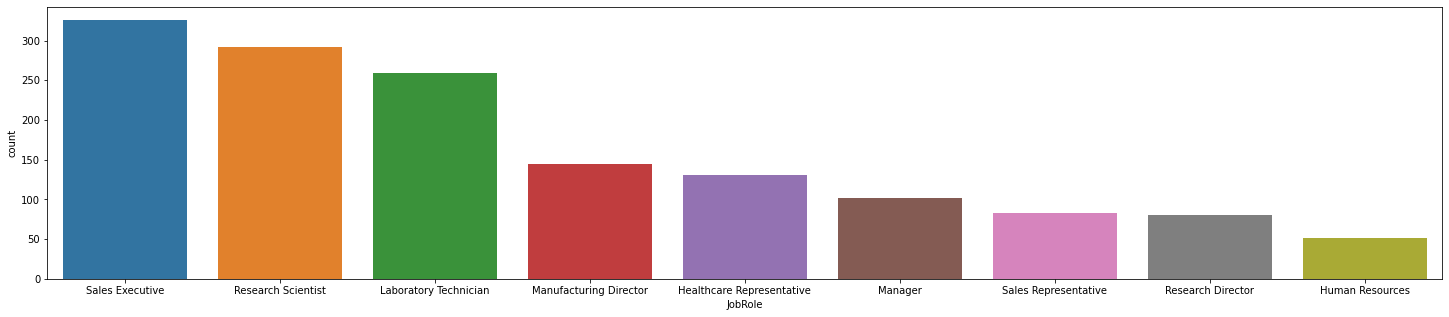

In [27]:
fig, ax =plt.subplots(figsize=(25,5))
sns.countplot(df['JobRole'])

- Most of the Employees had "Sales Executive" job role.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

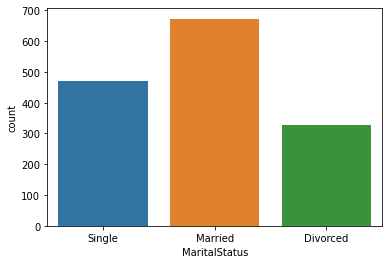

In [28]:
sns.countplot(df['MaritalStatus'])

- Marital status has 3 class.
- Married class freq is the highest.
- Single class is the second highest.
- Divorced class is the least.

<AxesSubplot:xlabel='Over18', ylabel='count'>

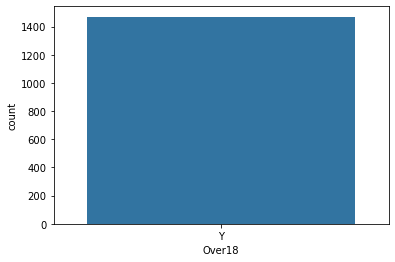

In [29]:
sns.countplot(df['Over18'])

- this variable has only one class and same unique value, so this variable can be dropped as the value is same in all rows and not much influencing the target col.

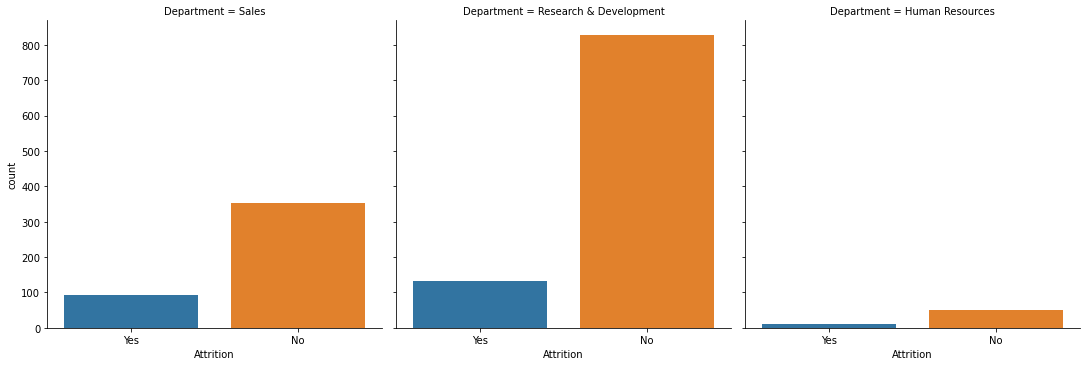

In [30]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [31]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


- Most of the observations corresspond to 'No' as we saw before , also about 81% of the people in HR do not want to leave the organisation and only 19% want to leave. Similarly, 13% of the people in R&D and 20% of the peoplr in Sales want to leave.

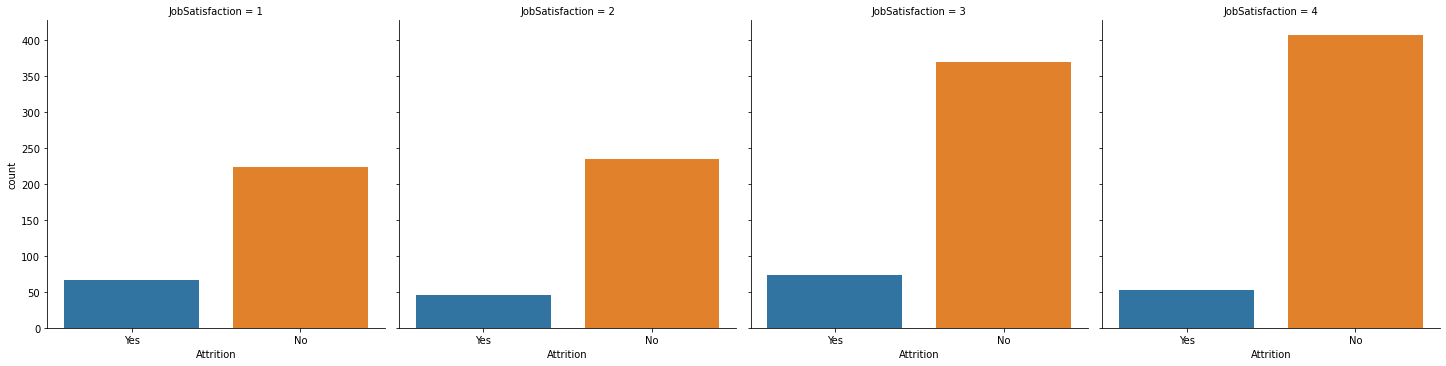

In [32]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [33]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


- This indicates an interesting trend. Note that for higher values of job satisfaction (i.e. a person is more satisfied with their job) a lower percentage of them say 'yes' which is quite clear because highly satisfied workers will avoid their unwillingness to leave the organisation.

In [34]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') 

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


- the relative percentage of 'No' in people with a higher degree of environmental satisfaction.

In [35]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') 

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


-  people with a better work-life balance do not want to leave the organization.

In [36]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') 

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


In [37]:
numeric_df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

# Disstplot

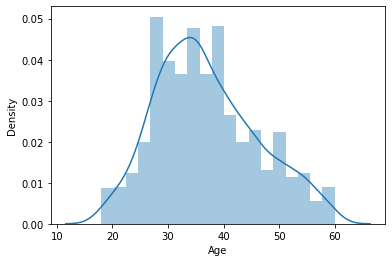

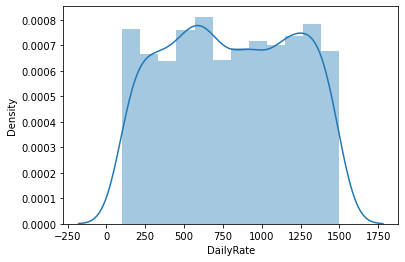

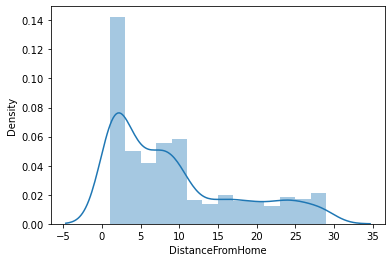

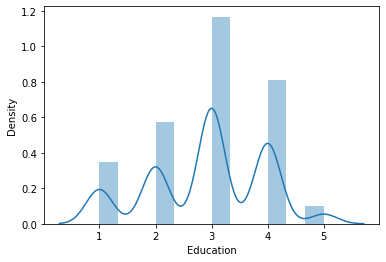

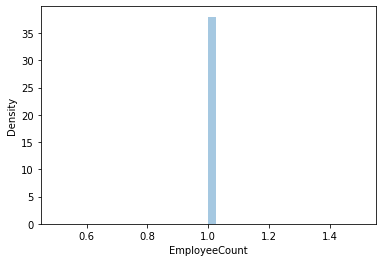

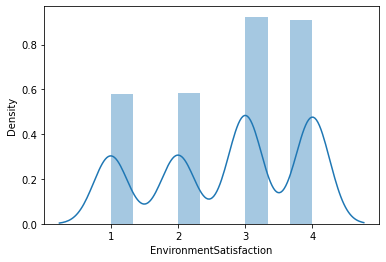

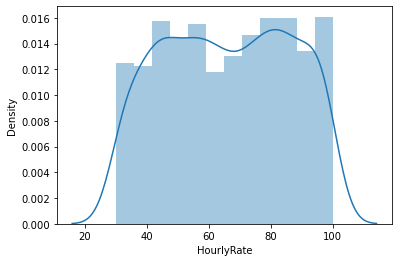

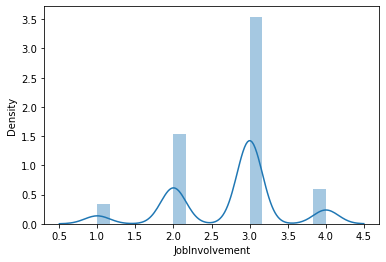

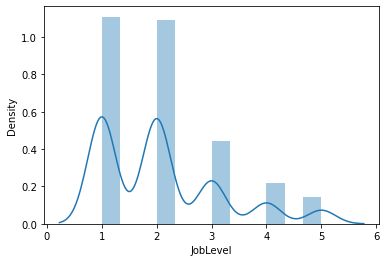

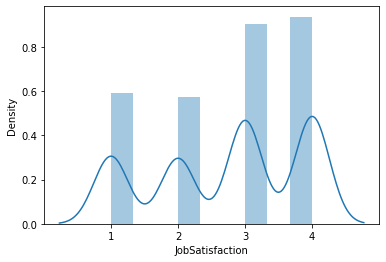

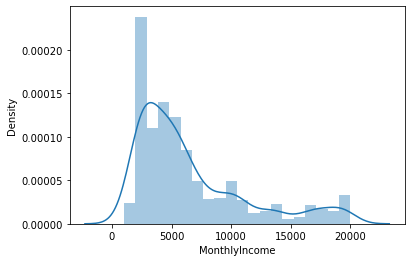

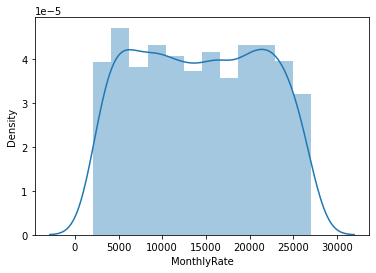

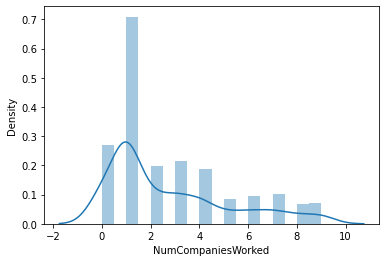

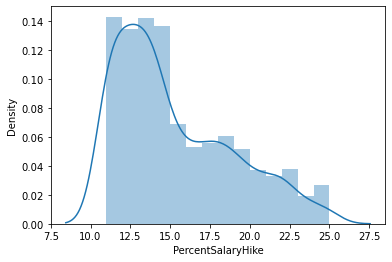

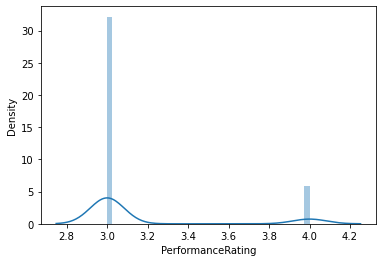

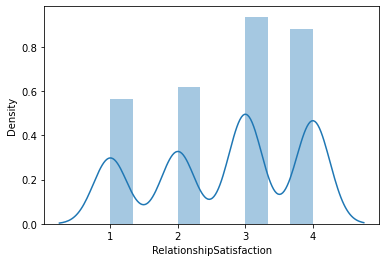

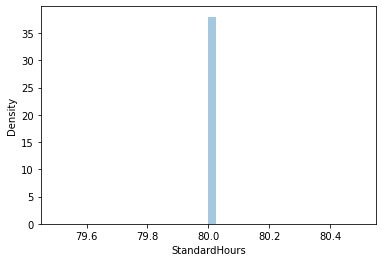

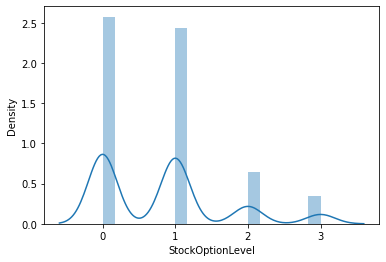

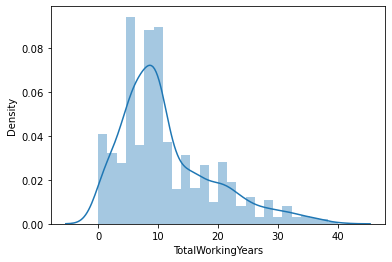

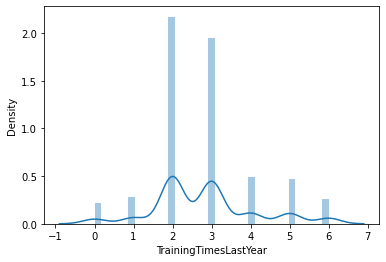

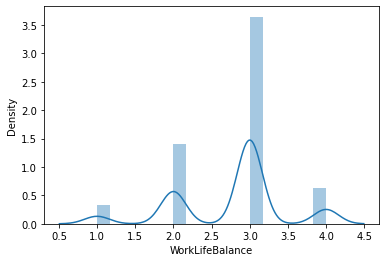

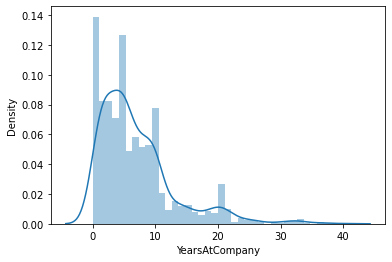

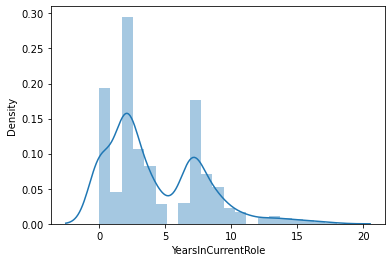

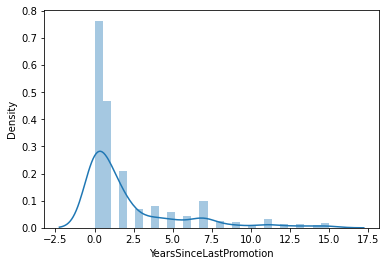

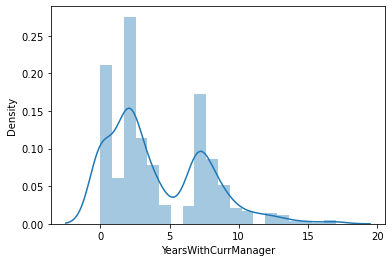

In [38]:
for i in numeric_df:
    plt.figure()
    sns.distplot(numeric_df[i])

- There are continous variable which are right skewed.

# Labelencoding Object & Categorical data type.

In [39]:
# categorical variable encoding
cat_vars_list = objects_df.columns.tolist()

le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

- all 9 categorical variable is label encoded for further analysis and to make model easy for analysis.

In [40]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


- we can see all the 9 object col is label encoded

In [41]:
df.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True)

In [42]:
df.shape

(1470, 31)

- These 3 variable are dropped (EmployeeCount,Over18,StandardHours) as there is only one value in all rows.
- These 3 variable is not much influencing the target col, hence dropped.

# Correlation & Heatmap

In [43]:
corr = df.corr()
corr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


<AxesSubplot:>

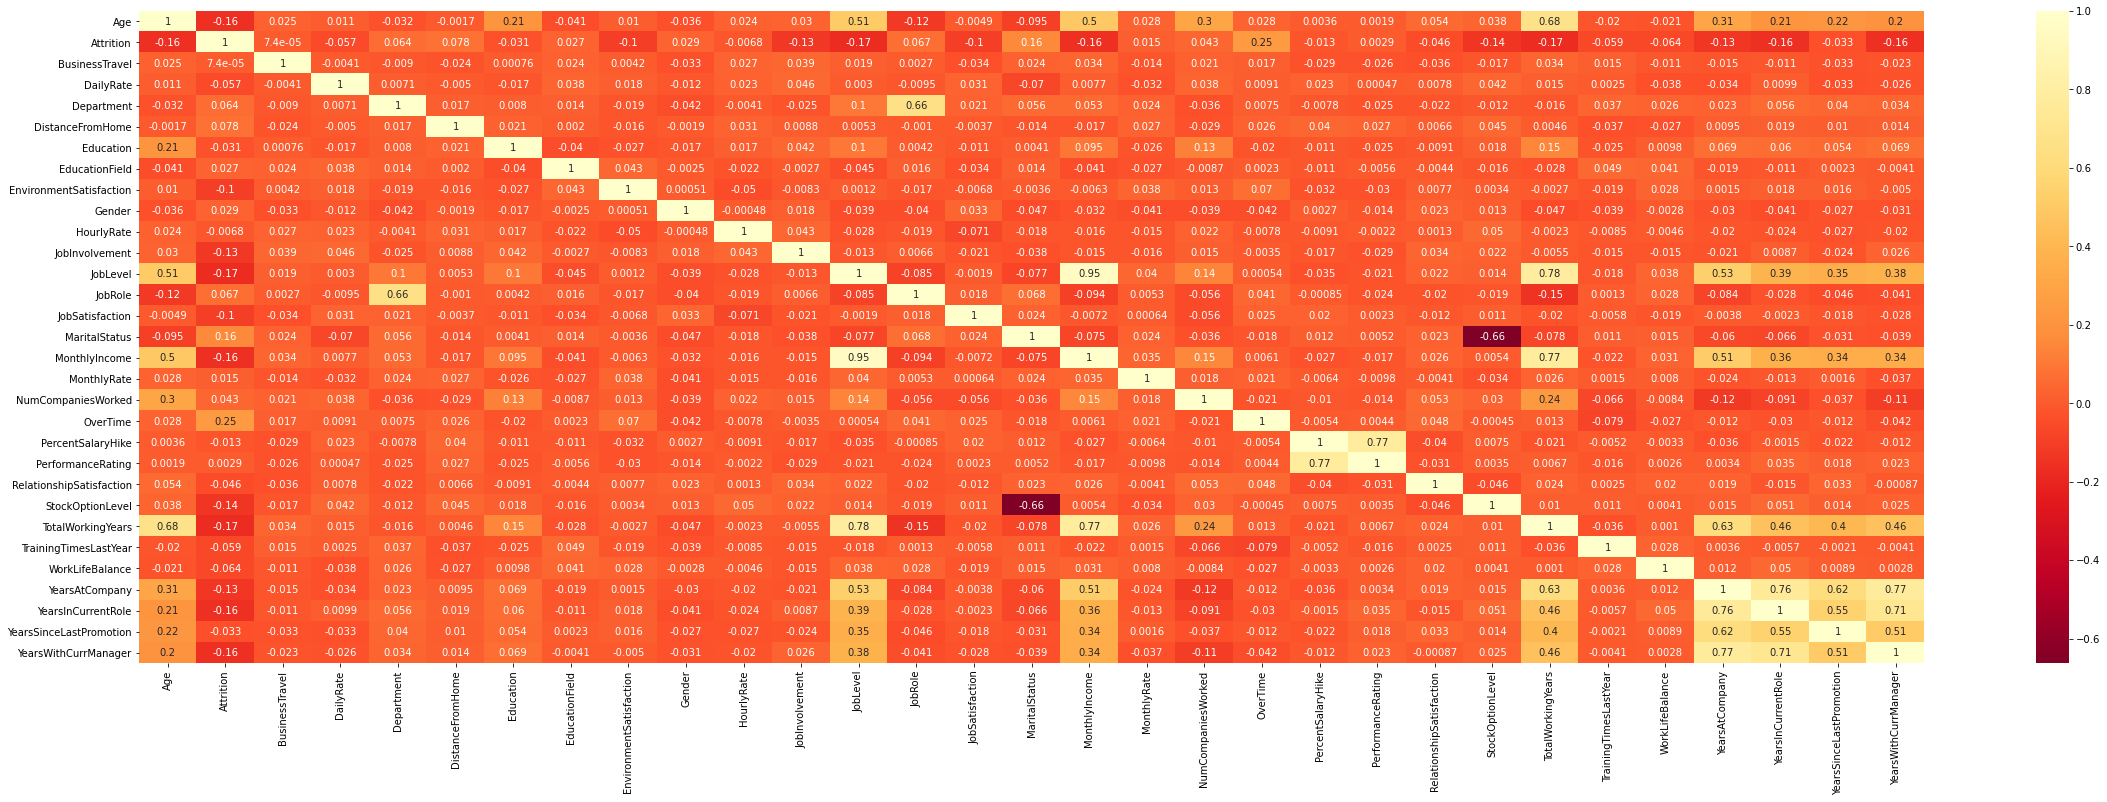

In [44]:
plt.figure(figsize=(40,12))
sns.heatmap(corr,cmap='YlOrRd_r', annot=True)

- Target col Attrition shows negative corr with almost all variables.
- Job level & Monthly income shows positive corr with (yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmamager & Totalworkingyears).
- Job level shows high positive corr with Monthlyh income.
- Age show positive corr with totalworkingyears and joblevel.

# VIF for multicollinearity test

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [46]:
vif_calc()

    VIF Factor                  features
0    33.357814                       Age
1     1.487236                 Attrition
2     6.749035            BusinessTravel
3     4.975791                 DailyRate
4    13.044796                Department
5     2.337540          DistanceFromHome
6     9.457866                 Education
7     3.872341            EducationField
8     7.198129   EnvironmentSatisfaction
9     2.518932                    Gender
10   11.246412                HourlyRate
11   15.236815            JobInvolvement
12   52.588213                  JobLevel
13    8.079370                   JobRole
14    7.096789           JobSatisfaction
15    5.867833             MaritalStatus
16   32.085296             MonthlyIncome
17    5.016385               MonthlyRate
18    2.762696        NumCompaniesWorked
19    1.552510                  OverTime
20   42.499948         PercentSalaryHike
21  124.654850         PerformanceRating
22    7.288455  RelationshipSatisfaction
23    3.326191  

- PerformanceRating has vif in the VIF table.
- JobLevel,PercentSalaryHike, MonthlyIncome shows some multicollinearity.
- None of variable will be dropped as the dimmesion of the dataframe will be reduced.

# Removing Skewness

In [47]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

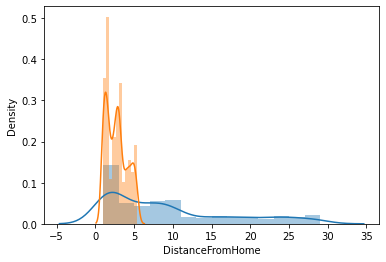

In [48]:
import numpy as np
sns.distplot(df['DistanceFromHome'])
df['DistanceFromHome']=np.sqrt(df['DistanceFromHome'])
sns.distplot(df['DistanceFromHome'])
df.skew()

- Orange graph shows right skeweness which got reduced with sqrt method

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

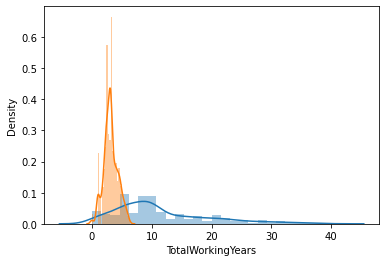

In [49]:
import numpy as np
sns.distplot(df['TotalWorkingYears'])
df['TotalWorkingYears']=np.sqrt(df['TotalWorkingYears'])
sns.distplot(df['TotalWorkingYears'])
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

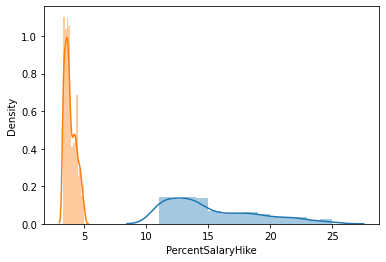

In [50]:
import numpy as np
sns.distplot(df['PercentSalaryHike'])
df['PercentSalaryHike']=np.sqrt(df['PercentSalaryHike'])
sns.distplot(df['PercentSalaryHike'])
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

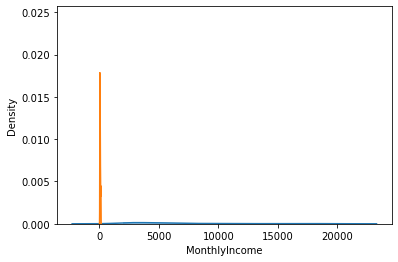

In [51]:
import numpy as np
sns.distplot(df['MonthlyIncome'])
df['MonthlyIncome']=np.sqrt(df['MonthlyIncome'])
sns.distplot(df['MonthlyIncome'])
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.398114
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.861960
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.655412
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           0.176358
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

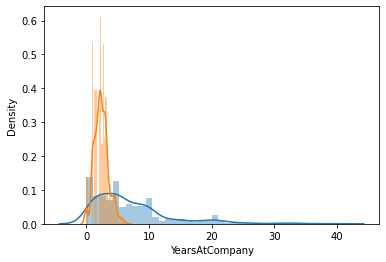

In [52]:
import numpy as np
sns.distplot(df['YearsAtCompany'])
df['YearsAtCompany']=np.sqrt(df['YearsAtCompany'])
sns.distplot(df['YearsAtCompany'])
df.skew()

# Dividing Dataset into Independent x & Dependent y

In [53]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [54]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1.000000,2,1,2,0,94,...,3,1,0,2.828427,0,1,2.449490,4,0,5
1,49,1,279,1,2.828427,1,1,3,1,61,...,4,4,1,3.162278,3,3,3.162278,7,1,7
2,37,2,1373,1,1.414214,2,4,4,1,92,...,3,2,0,2.645751,3,3,0.000000,0,0,0
3,33,1,1392,1,1.732051,4,1,4,0,56,...,3,3,0,2.828427,3,3,2.828427,7,3,0
4,27,2,591,1,1.414214,1,3,1,1,40,...,3,4,1,2.449490,3,3,1.414214,2,2,2


In [55]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

- y represent Target col-attrition.

we will be performing upsampling where class of 1(yes) will be balanced with class of 0(No)

In [56]:
# importing resample library from utils module to balance the class of target col.
from sklearn.utils import resample

In [57]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

In [58]:
Ano = x[x.Attrition==0]
Ays = x[x.Attrition==1]

- Ano instance for class 0-No
- Ays instance for class 1-Yes

In [59]:
dia_upsampled = resample(Ays,
                          replace=True, # sample with replacement
                          n_samples=len(Ano),   # match number in majority
                          random_state=27)  # reproducible results

In [60]:
upsampled = pd.concat([Ano, dia_upsampled])

In [61]:
upsampled.Attrition.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

- Both the class of target col is balanced.
- Class of 1(yes) is upsampled with class of 0(no)
- both class is balanced with value = 1233

In [62]:
upsampled.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1,49,1,279,1,2.828427,1,1,3,1,61,...,4,1,3.162278,3,3,3.162278,7,1,7,0
3,33,1,1392,1,1.732051,4,1,4,0,56,...,3,0,2.828427,3,3,2.828427,7,3,0,0
4,27,2,591,1,1.414214,1,3,1,1,40,...,4,1,2.449490,3,3,1.414214,2,2,2,0
5,32,1,1005,1,1.414214,2,1,4,1,79,...,3,0,2.828427,2,2,2.645751,7,3,6,0
6,59,2,1324,1,1.732051,3,3,3,0,81,...,1,3,3.464102,3,2,1.000000,0,0,0,0


In [63]:
x=upsampled.drop("Attrition",axis=1)
y=upsampled["Attrition"]

- dividing the independent variable & target variable from upsampled dataframe.

In [64]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,1,279,1,2.828427,1,1,3,1,61,...,4,4,1,3.162278,3,3,3.162278,7,1,7
3,33,1,1392,1,1.732051,4,1,4,0,56,...,3,3,0,2.828427,3,3,2.828427,7,3,0
4,27,2,591,1,1.414214,1,3,1,1,40,...,3,4,1,2.449490,3,3,1.414214,2,2,2
5,32,1,1005,1,1.414214,2,1,4,1,79,...,3,3,0,2.828427,2,2,2.645751,7,3,6
6,59,2,1324,1,1.732051,3,3,3,0,81,...,4,1,3,3.464102,3,2,1.000000,0,0,0


In [65]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: Attrition, dtype: int32

In [66]:
y.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

# Scaling

In [67]:
scaling = StandardScaler()
x=scaling.fit_transform(x)
x

array([[ 1.35506707, -0.98455558, -1.2366727 , ...,  0.93544334,
        -0.33121341,  0.96867805],
       [-0.29078567, -0.98455558,  1.55090027, ...,  0.93544334,
         0.31090316, -1.03219792],
       [-0.90798045,  0.60543398, -0.45525063, ..., -0.47838558,
        -0.01015513, -0.46051907],
       ...,
       [-1.42230943, -0.98455558,  1.49079088, ..., -0.47838558,
        -0.33121341, -0.46051907],
       [ 1.04646968,  0.60543398, -0.25989511, ...,  1.21820912,
         0.63196144,  0.96867805],
       [ 0.84073809,  0.60543398,  0.81205568, ...,  0.08714598,
        -0.6522717 , -0.46051907]])

# Dimension Reduction Technique: Principal Component Analysis.

In [68]:
from sklearn.decomposition import PCA

- As this dataset has high input variables, So I am using PCA technique to reduce the dimension of the dataframe.

In [69]:
pca = PCA(n_components=10)
x = pca.fit_transform(x)

We are setting the PCA = 10 variable or columns to independent variables(x).

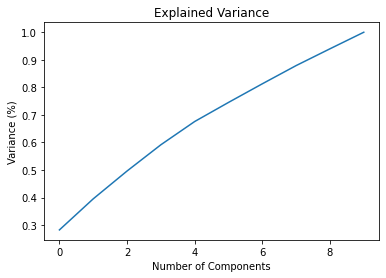

In [70]:
pca = PCA()
principalComponents = pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

As per above diagram there are only 8 component which are significant and can explain the percentage of variance.

In [71]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x)
principal_x = pd.DataFrame(new_data,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [72]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,1.021552,-0.322383,2.964593,-0.182041,0.495040,0.269976,1.491961,-0.952402
1,-0.342374,-0.541054,-0.987277,-0.491960,0.005623,0.745555,-0.219757,0.007090
2,-1.368111,1.737097,-1.075509,-0.286810,-0.568539,-0.704182,0.297350,-0.939401
3,-0.027316,-0.221574,-0.471389,-2.142592,-1.455195,1.131276,-0.820825,-0.017978
4,-0.886444,2.757275,2.739955,1.464470,1.347794,-1.081973,-1.945565,1.058779
...,...,...,...,...,...,...,...,...
2461,4.138897,0.608930,-0.106851,1.184176,-1.536002,1.342704,0.051851,0.150467
2462,-2.706457,0.287371,3.105729,1.007942,-1.326262,2.570205,0.893335,1.036509
2463,-2.091251,0.273939,-0.108232,-0.983503,-1.554179,-1.102712,-2.297270,-0.485421
2464,2.050415,-2.084952,-0.563429,-0.013760,-0.289057,0.341634,-0.457703,-1.360736


- principal_x shows scaled value which we will be using as the new independent variable(x)

In [73]:
x=principal_x

In [74]:
x.shape

(2466, 8)

- x has 2466 rows and 8 PCA component as independent variables.

In [75]:
y.shape

(2466,)

- Target col also has 2466 rows

In [76]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)  

90.41769041769042 at random_state 0
90.17199017199017 at random_state 1
92.13759213759214 at random_state 2
90.54054054054053 at random_state 3
89.06633906633907 at random_state 4
91.27764127764128 at random_state 5
90.7862407862408 at random_state 6
90.17199017199017 at random_state 7
90.54054054054053 at random_state 8
90.2948402948403 at random_state 9
89.55773955773955 at random_state 10
87.22358722358723 at random_state 11
91.4004914004914 at random_state 12
90.17199017199017 at random_state 13
89.92628992628993 at random_state 14
91.03194103194103 at random_state 15
88.32923832923832 at random_state 16
86.48648648648648 at random_state 17
89.43488943488943 at random_state 18
89.55773955773955 at random_state 19
89.31203931203932 at random_state 20
91.15479115479116 at random_state 21
88.45208845208845 at random_state 22
88.32923832923832 at random_state 23
89.92628992628993 at random_state 24
89.43488943488943 at random_state 25
90.17199017199017 at random_state 26
89.06633906633

In [77]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9297297297297298  on Random_state  38


- Above code is used to select best random sate out of 200 random state which is 38 with accuracy of 93%

# Splitting dataset in train & test

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 38)

- 70% data used to train the model and 30% data used to test & predict the model on test data.

# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

[1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1
 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1
 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1
 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1
 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1
 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1
 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1
 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1
 1 0 0 0 1 1 0 1 0 0 1 1 

- Log Regression Acc = 67%

# Decison tree Classifier

In [84]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.9162162162162162
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       356
           1       0.87      0.98      0.92       384

    accuracy                           0.92       740
   macro avg       0.92      0.91      0.92       740
weighted avg       0.92      0.92      0.92       740



- DTC Acc = 92%

# Random Forest Classifier

In [85]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.9527027027027027
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       356
           1       0.94      0.97      0.96       384

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



- RFC Acc = 95%

# Support Vector Classifier

In [86]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.768918918918919
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       356
           1       0.80      0.74      0.77       384

    accuracy                           0.77       740
   macro avg       0.77      0.77      0.77       740
weighted avg       0.77      0.77      0.77       740



- SVC Acc = 77%

# KNN Classifier

In [88]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.7905405405405406
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       356
           1       0.76      0.86      0.81       384

    accuracy                           0.79       740
   macro avg       0.80      0.79      0.79       740
weighted avg       0.80      0.79      0.79       740



- KNN Acc = 79%

- From above it is clear that Random Forest Classifier acc is the heighest with 95%.

# K-Fold Cross validation

In [89]:
cross_validation=KFold(5, shuffle =True) 

In [90]:
# Logistic regression
print(cross_val_score(lg,x,y,cv=cross_validation).mean())  

0.6816754399651807


In [91]:
# Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=cross_validation).mean())   

0.9071388097330235


In [92]:
# Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=cross_validation).mean())  

0.9687766381158076


In [93]:
# Support vector Classifier  
print(cross_val_score(SV,x,y,cv=cross_validation).mean()) 

0.7806242865706942


In [94]:
# KNN classifier
print(cross_val_score(knn,x,y,cv=cross_validation).mean()) 

0.8009025137347973


- From above it is clear that Random Forest Classifier cross validation score is the heighest with 96.88% comparing the rest.

In [108]:
print(confusion_matrix(y_test,pred))

[[325  31]
 [ 31 353]]


Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

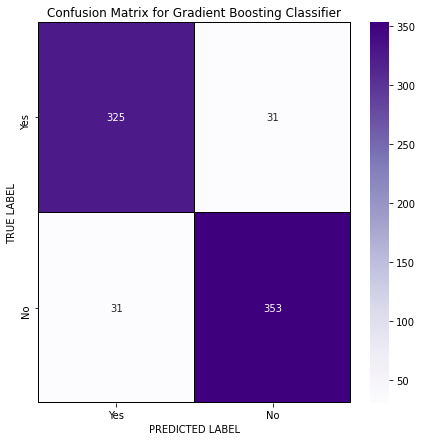

In [109]:
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')

325 + 353 correct predictions and 31+31 incorrect predictions.

# GridSearch CV & Hyperparameter Tuning

In [95]:
import numpy as np
parameter = {'max_depth' : np.arange(2,10),
            'criterion':['gini','entropy'],
            'n_estimators' : [100],
            'max_features' : ['auto','sqrt','log2']}

In [96]:
#Applying Gridsearch to best model random forest classifier
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=cross_validation)

In [97]:
GCV.fit(x_train,y_train)
# Grid search CV applied to the Training Dataset 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100]})

In [110]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 100}

- Best Parameter is selected from grid search CV which is

'criterion': 'gini','max_depth': 9,'max_features': 'sqrt','n_estimators': '100'.

# Best Model Selected is Random Forest Classifier

In [98]:
Final_mod = RandomForestClassifier(criterion = 'gini', max_depth = 9,max_features='sqrt',n_estimators= 100)
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.62162162162161


Final Accuracy of the best model = 91.62

# AUC-ROC Curve & AUC Score

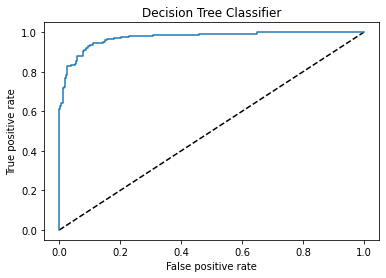

0.91609609082397

In [99]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is closer to top left corner hence I believe the model will give better performance.

# Exporting Model with joblib library

In [100]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

# Loading Model with joblib library

In [106]:
loadmodel = joblib.load('FinalModel.pkl')

# Prediction

In [107]:
import numpy as np
a = np.array(y_test)
predicted = np.array(loadmodel.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
735,1,1
736,1,1
737,1,1
738,0,0


The above dataframe have original data with the predicted data from the best model.

# Concluding Remarks

We ended up creating an early warning system for our customer to help them predict whether an employee is likely to leave the company or not.